Business Problem:
Detecting sarcasm is crucial for accurate sentiment analysis in various fields, including customer feedback, public relations, brand management, social media monitoring, and ad campaign analysis. Misinterpreting sarcastic comments can lead to flawed insights and responses, adversely affecting businesses. This project aims to develop a model capable of accurately identifying and understanding sarcasm in textual data to improve sentiment analysis and decision-making processes.


Data Loading and Cleaning: The dataset was loaded from kaggle_train.csv, and missing values in the 'comment' column were filled with empty strings to ensure data integrity. To manage computational resources efficiently, a sample of 10,000 records was selected from the dataset.

Label Encoding: Categorical labels (sarcastic or non-sarcastic) were converted into numerical values (0 and 1) using LabelEncoder, making them suitable for machine learning models.

Text Vectorization: The TF-IDF vectorizer was employed with a maximum of 5,000 features to transform the text data into numerical features. This method balances the importance of frequent and rare words, providing a meaningful representation of the text data.

Train-Test Split: The dataset was divided into training and testing sets using an 80-20 split. This ensures that the model is trained on a substantial portion of the data while being evaluated on unseen data to assess its generalization performance.

Model Building: A Convolutional Neural Network (CNN) was constructed using a Sequential model. The architecture included Conv1D layers with ReLU activation to capture local patterns in the text, a GlobalMaxPooling1D layer to reduce dimensionality, and dense layers with dropout for regularization and batch normalization for stability. The final layer was a sigmoid output layer for binary classification.

Model Training and Evaluation: The model was trained with early stopping to prevent overfitting and a learning rate scheduler to adjust the learning rate during training. The performance of the model was evaluated on the test set by calculating the F1 score and accuracy. Additionally, a classification report and confusion matrix were generated to provide detailed insights into the model's performance.

Import Necessary Libraries


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

Loading the dataset and Splitting it



# Load the dataset
data = pd.read_csv('kaggle_train.csv')

# Handle missing values in the 'comment' column
data['comment'].fillna('', inplace=True)

# Reduce dataset size for memory efficiency (sample 10,000 records)
data = data.sample(n=10000, random_state=42)

# Encode target labels if necessary
label_column = 'label'
label_encoder = LabelEncoder()
data[label_column] = label_encoder.fit_transform(data[label_column])

# Text Vectorization using TF-IDF with fewer features
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(data['comment']).toarray()

# Split data into features and target
y = data[label_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




Building the Layers

# Define the CNN model
def build_cnn_model():
    model = Sequential()
    
    # Input layer
    model.add(Input(shape=(X_train.shape[1], 1)))
    
    # Conv1D layer
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    
    # Flatten layer
    model.add(Flatten())
    
    # Dense layers with dropout and batch normalization
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Build the model with the specified configuration
model_cnn = build_cnn_model()

# Define early stopping and learning rate scheduler
early_stopping_cnn = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

def scheduler_cnn(epoch, lr):
    if epoch < 10:
        return float(lr)
    else:
        return float(lr * np.exp(-0.1))

lr_scheduler_cnn = LearningRateScheduler(scheduler_cnn)

# Reshape the data for CNN input
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the CNN model
history_cnn = model_cnn.fit(
    X_train_cnn, y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    callbacks=[early_stopping_cnn, lr_scheduler_cnn]
)

# Predict on the test set for CNN model
y_pred_cnn = (model_cnn.predict(X_test_cnn) > 0.5).astype("int32")

# Calculate the F1 score and accuracy for CNN model
f1_cnn = f1_score(y_test, y_pred_cnn)
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print(f"CNN F1 Score: {f1_cnn}")
print(f"CNN Accuracy: {accuracy_cnn}")

# Function to preprocess and predict new input for CNN model
def preprocess_and_predict_cnn(comment):
    # Preprocess the input comment
    input_vector = tfidf.transform([comment]).toarray()
    input_vector = input_vector.reshape(input_vector.shape[0], input_vector.shape[1], 1)
    
    # Make prediction
    prediction = (model_cnn.predict(input_vector) > 0.5).astype("int32")
    return prediction



In [ ]:
# Function to determine if a comment is sarcastic or not
def is_sarcastic(comment):
    prediction = preprocess_and_predict_cnn(comment)
    if prediction[0][0] == 1:
        return "Sarcastic"
    else:
        return "Not Sarcastic"

# Example usage for new input with CNN model
new_comment_cnn = "This is a sample comment for prediction."
prediction_cnn = is_sarcastic(new_comment_cnn)
print(f"Prediction for new comment with CNN model: {prediction_cnn}")

# Interactive input for user to check if a comment is sarcastic
while True:
    user_input = input("Enter a comment to check if it is sarcastic or 'exit' to quit: ")
    if user_input.lower() == 'exit':
        break
    print(f"Prediction: {is_sarcastic(user_input)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Prediction for new comment with CNN model: Not Sarcastic


Enter a comment to check if it is sarcastic or 'exit' to quit:  Just what I needed, more work to do over the weekend.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Prediction: Not Sarcastic


Enter a comment to check if it is sarcastic or 'exit' to quit:  Oh, wonderful, it's raining just when I forgot my umbrella.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction: Sarcastic


Enter a comment to check if it is sarcastic or 'exit' to quit:  Oh great, another meeting that could have been an email.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Prediction: Sarcastic


Enter a comment to check if it is sarcastic or 'exit' to quit:  I enjoyed the movie we watched last night.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Prediction: Sarcastic


In [5]:
from sklearn.metrics import classification_report

# Generate and print the classification report
report = classification_report(y_test, y_pred_cnn)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.76      0.68       996
           1       0.69      0.51      0.59      1004

    accuracy                           0.64      2000
   macro avg       0.65      0.64      0.63      2000
weighted avg       0.65      0.64      0.63      2000



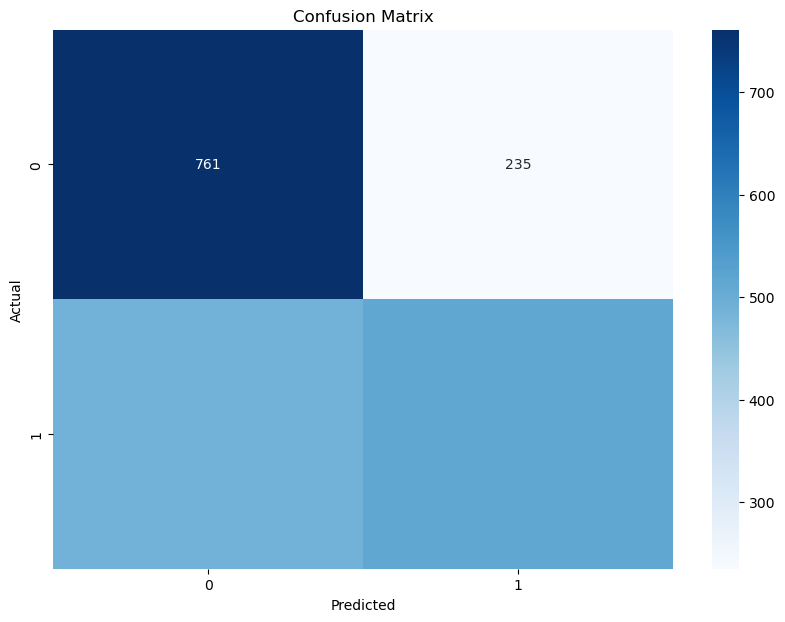

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_cnn)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
